In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/Users/ivanpakhomov/Desktop/parsing.csv', sep=',')

In [54]:
df

,Unnamed: 0,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объем двигателя,Цвет,Запас хода
0,0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,NaN
1,1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,NaN
2,2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,NaN,NaN,чёрный,Заряд на 547 км
3,3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый,NaN
4,4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,3697,LADA (ВАЗ) Priora I,200000,2009,203000,передний,98,Бензин,хэтчбек 5 дв.,механика,1.6,чёрный,NaN
3698,3698,Skoda Superb I Рестайлинг,1145000,2008,53000,передний,150,Бензин,седан,автомат,1.8,серый,NaN
3699,3699,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный,NaN
3700,3700,Renault Kangoo I,90000,2001,220000,передний,80,Дизель,компактвэн,механика,1.9,серый,NaN


In [55]:
df.isnull().sum()

Unnamed: 0            0
Модель                0
Цена                  0
Год выпуска           0
Пробег                0
Привод                0
ЛС                    0
Тип двигателя         0
Тип кузова            0
Коробка передач      40
Объем двигателя      40
Цвет                  0
Запас хода         3662
dtype: int64

### Как мы видим, у нас есть пропуски в данных о запасе хода для автомобилей с обычным двигателем, о коробке передач и объеме двигателя для электромобилей. Так как пропусков в запасе хода большая часть от всех данных, мы его удалим. А пропуски по электромобилям в коробке передач и объеме двигателя мы заполним следующими данными: так как коробка передач является категориальным признаком, а в электромобилях ее нет, мы заменим пропуски на автомат, так как по механике вождения они ничем не отличаются (а для покупателей это одно и то же), а объем двигателя заменим на среднее, так как это достаточно мощные автомобили и было бы неправильно заменять нулем или чем-то другим.

In [56]:
df.drop('Unnamed: 0', axis=1, inplace=True) #удалим ненужный нам столбец с повтором индексов

In [57]:
df.drop('Запас хода', axis=1, inplace=True)

In [58]:
df['Коробка передач'].fillna('автомат', inplace=True)

In [59]:
df['Объем двигателя'].fillna(df['Объем двигателя'].mean(), inplace=True)

In [60]:
df

,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объем двигателя,Цвет
0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.200000,чёрный
1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.200000,чёрный
2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,автомат,2.416603,чёрный
3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.600000,белый
4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.000000,фиолетовый
...,...,...,...,...,...,...,...,...,...,...,...
3697,LADA (ВАЗ) Priora I,200000,2009,203000,передний,98,Бензин,хэтчбек 5 дв.,механика,1.600000,чёрный
3698,Skoda Superb I Рестайлинг,1145000,2008,53000,передний,150,Бензин,седан,автомат,1.800000,серый
3699,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.000000,красный
3700,Renault Kangoo I,90000,2001,220000,передний,80,Дизель,компактвэн,механика,1.900000,серый


In [61]:
df['Объем двигателя'] = df['Объем двигателя'].round(1) #округлим полученные значения, чтобы было красиво

In [62]:
df

,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объем двигателя,Цвет
0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный
1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный
2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,автомат,2.4,чёрный
3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый
4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый
...,...,...,...,...,...,...,...,...,...,...,...
3697,LADA (ВАЗ) Priora I,200000,2009,203000,передний,98,Бензин,хэтчбек 5 дв.,механика,1.6,чёрный
3698,Skoda Superb I Рестайлинг,1145000,2008,53000,передний,150,Бензин,седан,автомат,1.8,серый
3699,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный
3700,Renault Kangoo I,90000,2001,220000,передний,80,Дизель,компактвэн,механика,1.9,серый


In [63]:
df.isnull().sum() 

Модель             0
Цена               0
Год выпуска        0
Пробег             0
Привод             0
ЛС                 0
Тип двигателя      0
Тип кузова         0
Коробка передач    0
Объем двигателя    0
Цвет               0
dtype: int64

In [181]:
pd.DataFrame.drop_duplicates(df, inplace = True)

In [212]:
df

,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объем двигателя,Цвет
0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный
1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный
2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,автомат,2.4,чёрный
3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый
4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый
...,...,...,...,...,...,...,...,...,...,...,...
3691,Hyundai Sonata VIII (DN8),2949000,2020,49538,передний,183,Бензин,седан,автомат,1.6,белый
3692,Kia Rio II Рестайлинг,379000,2009,175645,передний,97,Бензин,хэтчбек 5 дв.,механика,1.4,серый
3693,Toyota Venza I Рестайлинг,1849000,2013,131320,полный,185,Бензин,внедорожник 5 дв.,автомат,2.7,коричневый
3699,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2558 entries, 0 to 3701
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Модель           2558 non-null   object 
 1   Цена             2558 non-null   int64  
 2   Год выпуска      2558 non-null   int64  
 3   Пробег           2558 non-null   int64  
 4   Привод           2558 non-null   object 
 5   ЛС               2558 non-null   int64  
 6   Тип двигателя    2558 non-null   object 
 7   Тип кузова       2558 non-null   object 
 8   Коробка передач  2558 non-null   object 
 9   Объем двигателя  2558 non-null   float64
 10  Цвет             2558 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 239.8+ KB


### Кратко опишем данные: пока что у нас 11 признаков, 5 из которых (цена, год выпуска, пробег, ЛС, объем двигателя) являются числовыми, а 6 (модель, привод, тип двигателя, тип кузова, коробка передач, цвет) - категориальными.

### Ура, мы избавились от пропусков и повторов(некоторые страницы запарсились несколько раз), теперь можем переходить к визуализации и дальнейшей обработке данных 

### Для начала хотелось бы посмотреть на корреляцию наших числовых признаков с ценой

In [185]:
df['Цена']/1000000

0        4.379
1        2.519
2       15.490
3        1.330
4       59.500
         ...  
3691     2.949
3692     0.379
3693     1.849
3699     2.758
3701     3.450
Name: Цена, Length: 2558, dtype: float64

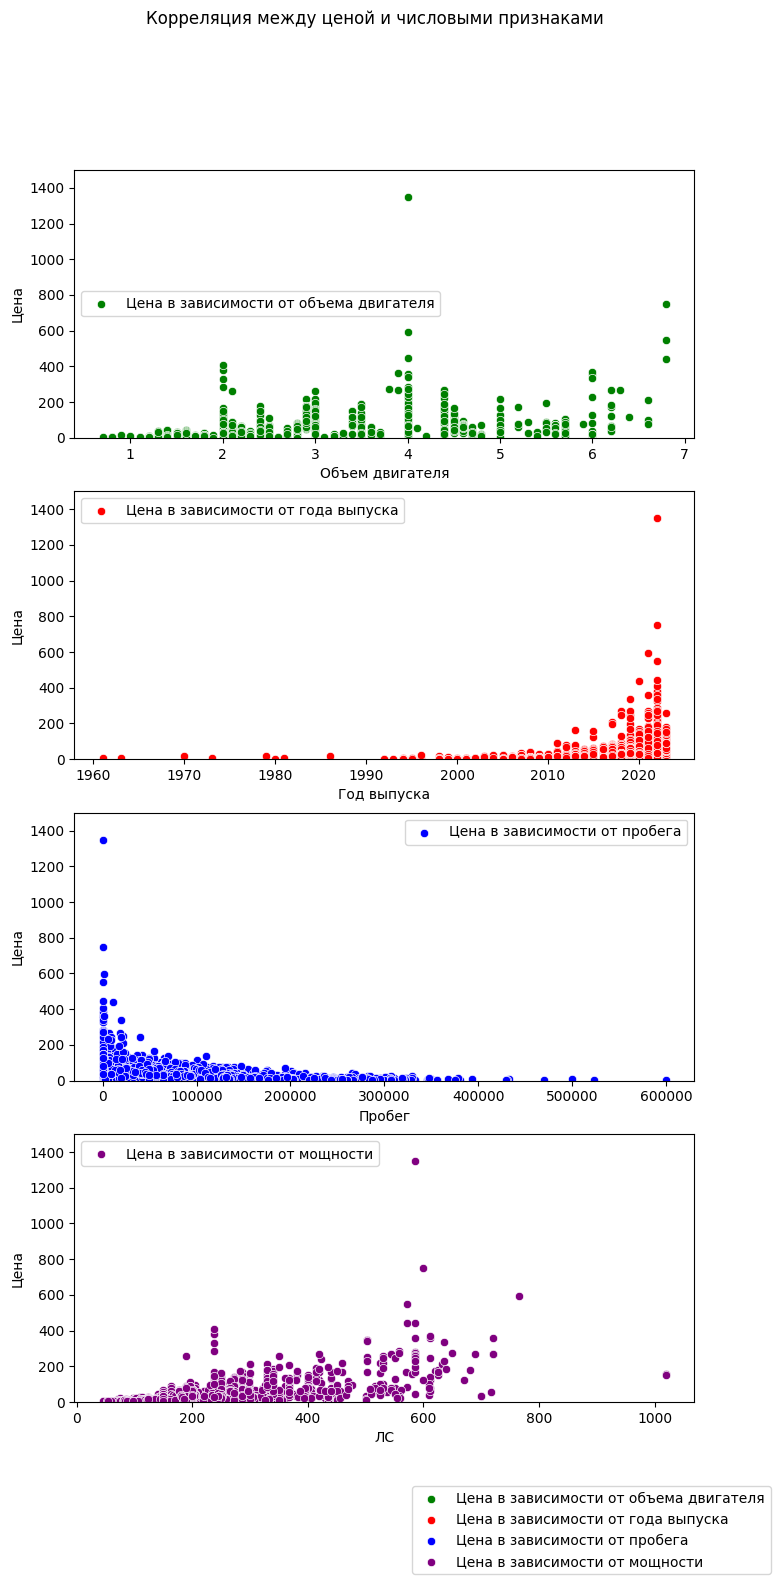

In [186]:
fig = plt.figure(figsize=(8, 16))
fig.suptitle('Корреляция между ценой и числовыми признаками')

plt.subplot(4, 1, 1)
sns.scatterplot( x = df['Объем двигателя'], y = df['Цена']/100000, data = df, label = 'Цена в зависимости от объема двигателя', color = 'g').set_ylim(0, 1500)

plt.subplot(4, 1, 2)
sns.scatterplot( x = df['Год выпуска'], y = df['Цена']/100000, data = df, label = 'Цена в зависимости от года выпуска',  color = 'r').set_ylim(0, 1500)

plt.subplot(4, 1, 3)
sns.scatterplot( x = df['Пробег'], y = df['Цена']/100000, data = df, label = 'Цена в зависимости от пробега', color = 'b').set_ylim(0, 1500)

plt.subplot(4, 1, 4)
sns.scatterplot( x = df['ЛС'], y = df['Цена']/100000, data = df, label = 'Цена в зависимости от мощности', color = 'purple').set_ylim(0, 1500)

fig.legend(loc='lower right')
plt.show();

### Мы можем видеть по графикам, что цена больше всего зависит от года выпуска и мощности автомобиля, обратно зависит от пробега и напрямую не зависит от объема двигателя. Также у нас есть выброс, машина по цене 135 млн. руб., но к обработке данных мы приступим позже

### Давайте визуализируем самые популярные цвета

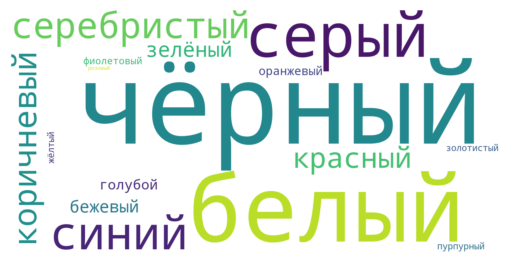

In [189]:
from wordcloud import WordCloud
df_string = df['Цвет'].to_string()
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(df_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### Вернемся к более серьезному анализу и построим распределение числовых признаков

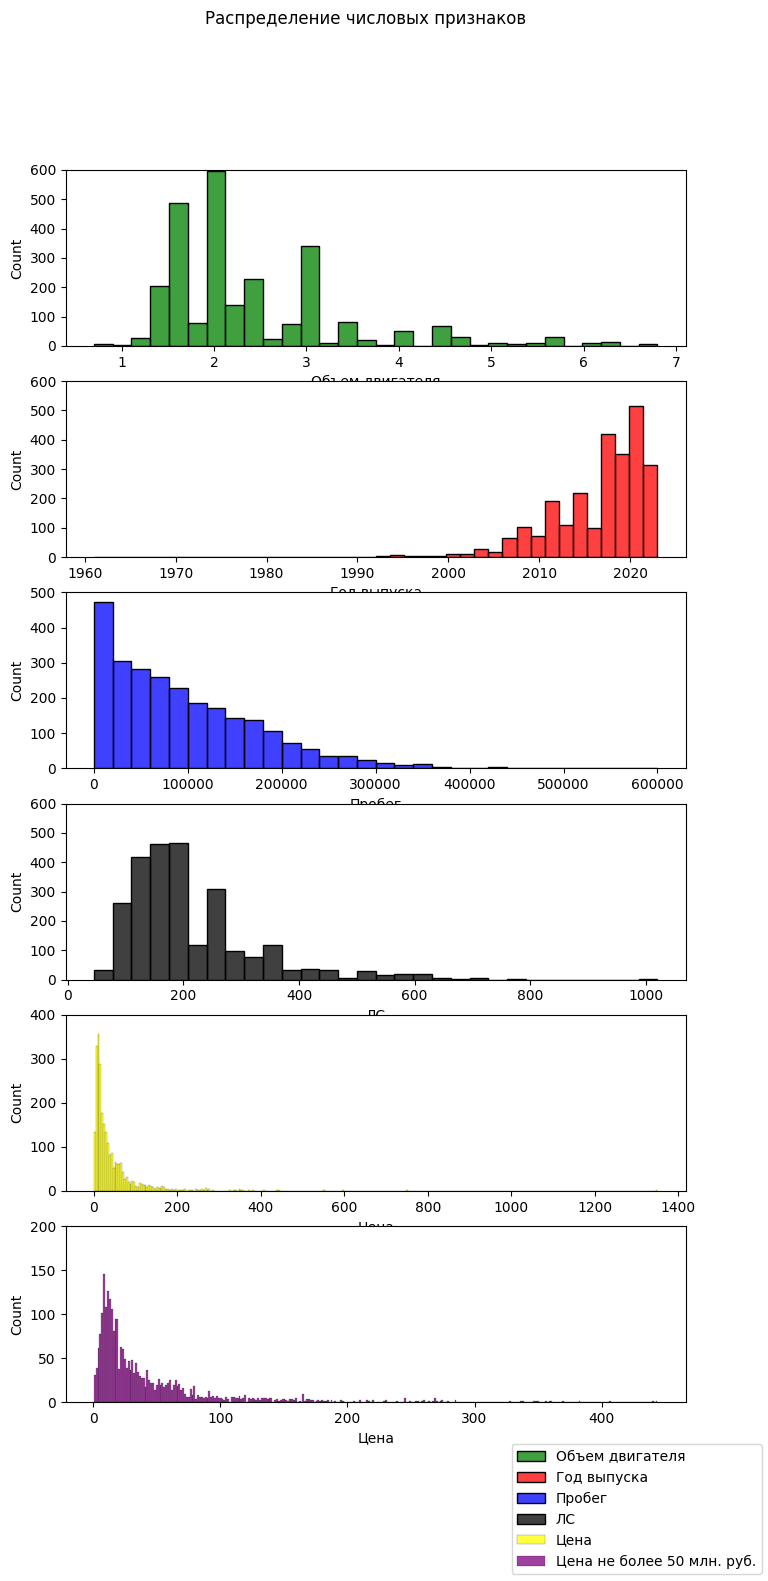

In [211]:
fig = plt.figure(figsize=(8, 16))
fig.suptitle('Распределение числовых признаков')

plt.subplot(6, 1, 1)
sns.histplot(df['Объем двигателя'], label = 'Объем двигателя', bins = 30, color = 'g').set_ylim(0, 600)

plt.subplot(6, 1, 2)
sns.histplot(df['Год выпуска'],label = 'Год выпуска', bins = 40, color = 'r').set_ylim(0, 600)

plt.subplot(6, 1, 3)
sns.histplot(df['Пробег'], label = 'Пробег', bins = 30, color = 'b').set_ylim(0, 500)

plt.subplot(6, 1, 4)
sns.histplot(df['ЛС'], label = 'ЛС', bins = 30, color = 'black').set_ylim(0, 600)

plt.subplot(6, 1, 5)
sns.histplot(df['Цена']/100000, label = 'Цена', bins = 300, color = 'yellow').set_ylim(0, 400)

plt.subplot(6, 1, 6)
sns.histplot(df[df['Цена'] <= 50000000]['Цена']/100000, label = 'Цена не более 50 млн. руб.', bins = 300, color = 'purple').set_ylim(0, 200)


fig.legend(loc='lower right');

### Ни одно из распределений не похоже на нормальное, почти везде есть 'тяжелые 'хвосты

### Давайте добавим новые переменные